# THIS USES LOGISTIC REGRESSION && DECISION TREE

## Some Definition of terms in the DataSet
     * cp -- Chest Pain
     * trtbps -- total resting blood pressure

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time as dt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score,confusion_matrix, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay
import warnings
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [82]:
df.shape

(303, 14)

In [83]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [85]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

In [86]:
df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [87]:
df['output'].value_counts()

1    165
0    138
Name: output, dtype: int64

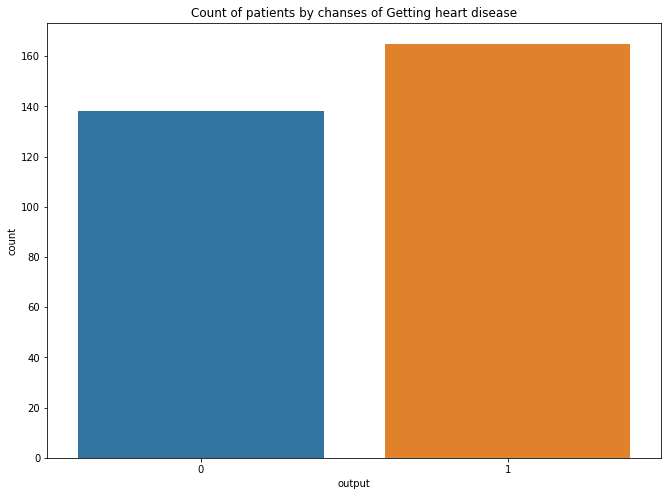

In [88]:
plt.figure(figsize=(11,8))
sns.countplot(x='output', data=df)
plt.title('Count of patients by chanses of Getting heart disease')
plt.show()


In [89]:
df['output'].value_counts(normalize=True)*100

1    54.455446
0    45.544554
Name: output, dtype: float64

In [90]:
 df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


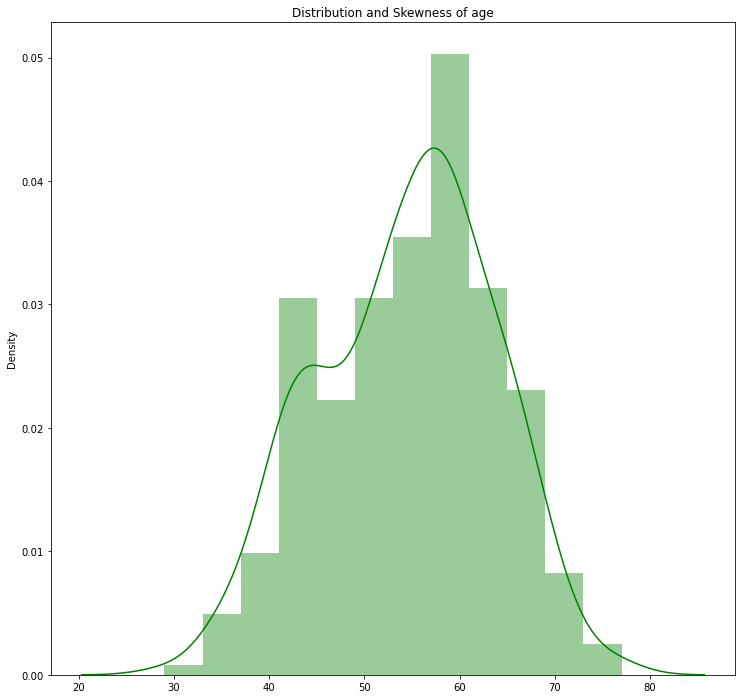

In [91]:
plt.figure(figsize=(27,12))
plt.subplot(1,2,2)
sns.distplot(x=df['age'], color='g')
plt.title('Distribution and Skewness of age')
plt.show()

In [92]:
 df.head(2)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


### Finding the Percentage (%) of Males and Females in the Dataset

In [93]:
df['sex'].value_counts(normalize=True)*100

1    68.316832
0    31.683168
Name: sex, dtype: float64

In [94]:
# meaning 68% are Male While 32% are Females

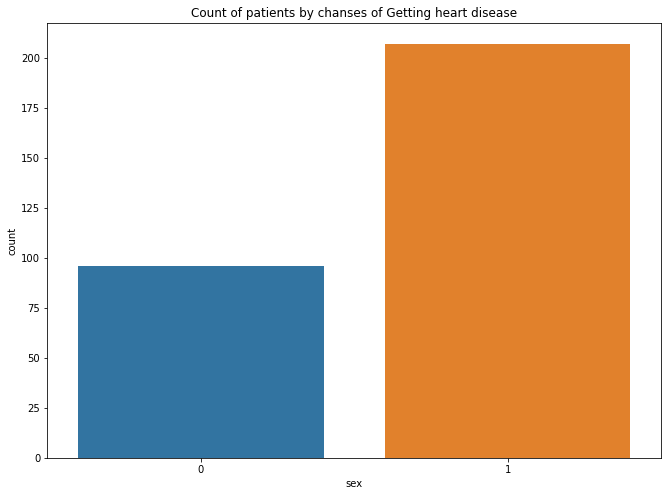

In [95]:
plt.figure(figsize=(11,8))
sns.countplot(x='sex', data=df)
plt.title('Count of patients by chanses of Getting heart disease')
plt.show()


In [96]:
df.head(3)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1


In [97]:
df['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [98]:
df['cp'].value_counts(normalize=True)*100

0    47.194719
2    28.712871
1    16.501650
3     7.590759
Name: cp, dtype: float64

In [99]:
#47.19% of the patients have chest pain type 0.
#16.50% of the patients have chest pain type 1.
#28.71% of the patients have chest pain type 2.
#7.50% of the patients have chest pain type 3.

Text(0.5, 1.0, 'Total count by Chest pain type(Cp)')

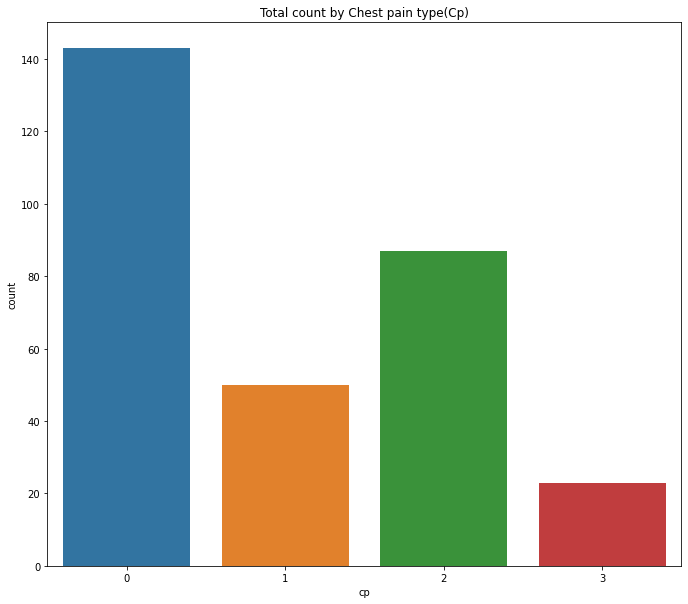

In [100]:
plt.figure(figsize=(25,10))

plt.subplot(1,2,1)
sns.countplot(x='cp',data=df)
plt.title('Total count by Chest pain type(Cp)')

In [101]:
#Checking the Outlies in the trtbps by output


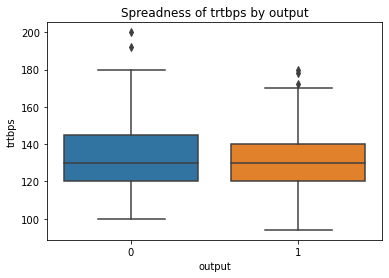

In [102]:
sns.boxplot(x='output', y='trtbps', data=df)
plt.title('Spreadness of trtbps by output')
plt.show()

In [103]:
## The distribution is slightly right-skewed, likely due to the presence of these outliers.



# Using Logestic Regression

In [104]:
X = df.drop('output', axis=1)
y = df['output']

X.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [106]:
X_train

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [107]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [108]:
clf.coef_

array([[ 7.13499715e-03, -1.19150391e+00,  7.72245698e-01,
        -1.06831829e-02, -1.14858097e-03, -7.88134674e-04,
         5.30691113e-01,  2.64958933e-02, -8.23192127e-01,
        -6.78645427e-01,  6.17088043e-01, -7.44111683e-01,
        -1.00416381e+00]])

In [109]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

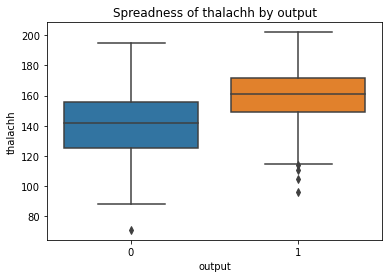

In [110]:
sns.boxplot(x='output', y='thalachh', data=df)
plt.title('Spreadness of thalachh by output')
plt.show()

In [111]:
y_pred_train = clf.predict(X_train)


In [114]:
clf.intercept_

array([0.02795514])

In [133]:
print('Accuracy: ', accuracy_score(y_train, y_pred_train)*100,'%')
print('Precision: ', precision_score(y_train, y_pred_train))
print('Recall: ', recall_score(y_train, y_pred_train))
print('F1 Score: ', f1_score(y_train, y_pred_train))

Accuracy:  85.53719008264463 %
Precision:  0.8356164383561644
Recall:  0.9172932330827067
F1 Score:  0.8745519713261649


# Confusion matrix


In [118]:
cm = DecisionTreeClassifier()
cm.fit(X_train, y_train)
y_pred=cm.predict(X_test)


In [119]:
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm

array([[27,  2],
       [ 8, 24]], dtype=int64)

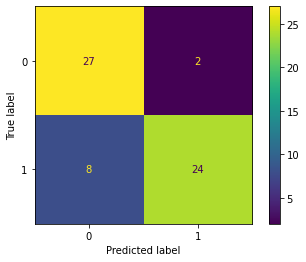

In [123]:
 

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot();

# Decision Tree Aspect

In [124]:
tree = DecisionTreeClassifier(random_state=12)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=12)

In [125]:
tree_y_pred = tree.predict(X_test)
tree_y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [134]:
print('Accuracy: ', accuracy_score(y_test, tree_y_pred) *100, '%')
print('Precision: ', precision_score(y_test, tree_y_pred))
print('Recall: ', recall_score(y_test, tree_y_pred))
print('F1 Score: ', f1_score(y_test, tree_y_pred))

Accuracy:  83.60655737704919 %
Precision:  0.8928571428571429
Recall:  0.78125
F1 Score:  0.8333333333333334


# SOME FINDINGS

In [ ]:
#For the Decision Tree Finding

Accuracy:  83.60655737704919 %
Precision:  0.8928571428571429
Recall:  0.78125
F1 Score:  0.8333333333333334

In [128]:
# For the Logistic Regression
Accuracy:  85.53719008264463 %
Precision:  0.8356164383561644
Recall:  0.9172932330827067
F1 Score:  0.8745519713261649

## Conclusion 

  These results clearly show that the Logistic Regression model 
  outperforms the Decision Tree. As a result, we can predict a patient's 
  likelihood of heart disease with an accuracy of 85.53% based on the given features.

